In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [3]:
img_height = 128
img_width = 128
batch_size = 32

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
color_mode='grayscale',
image_size=(img_height, img_width),
batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
val_dir,
color_mode='grayscale',
image_size=(img_height, img_width),
batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
color_mode='grayscale',
image_size=(img_height, img_width),
batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
train_ds.class_names

['NORMAL', 'PNEUMONIA']

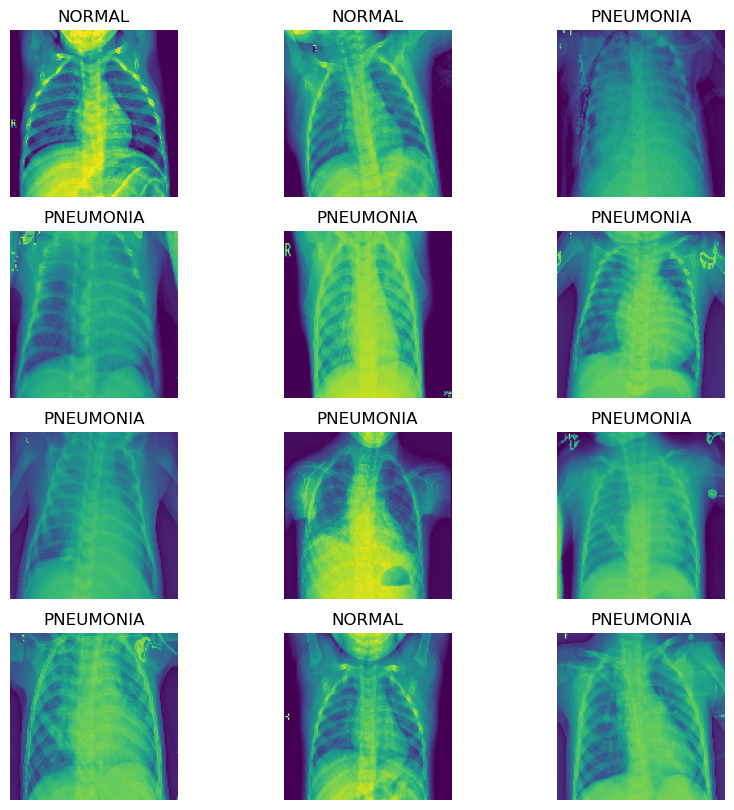

In [6]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(12):
        plt.subplot(4, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
                   

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [8]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [10]:
epochs = 10

In [11]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 [==============================] - 74s 438ms/step - loss: 0.2393 - accuracy: 0.8993 - val_loss: 0.3446 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 59s 360ms/step - loss: 0.0939 - accuracy: 0.9641 - val_loss: 0.6980 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 58s 357ms/step - loss: 0.0827 - accuracy: 0.9688 - val_loss: 0.3712 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 58s 353ms/step - loss: 0.0733 - accuracy: 0.9722 - val_loss: 0.3820 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 58s 357ms/step - loss: 0.0581 - accuracy: 0.9799 - val_loss: 0.5126 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 58s 356ms/step - loss: 0.0538 - accuracy: 0.9799 - val_loss: 0.5050 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 58s 355ms/step - loss: 0.0430 - accuracy: 0.9841 - val_loss: 0.4777 - val_accuracy: 0.7

In [12]:
model.evaluate(test_ds)

20/20 [==============================] - 4s 132ms/step - loss: 1.8912 - accuracy: 0.7147


[1.8912384510040283, 0.7147436141967773]